## Author:----> Abhishek kumar
## Project:----> IMDB_Movie_Review_Sentiment_Analysis DL NLP Project

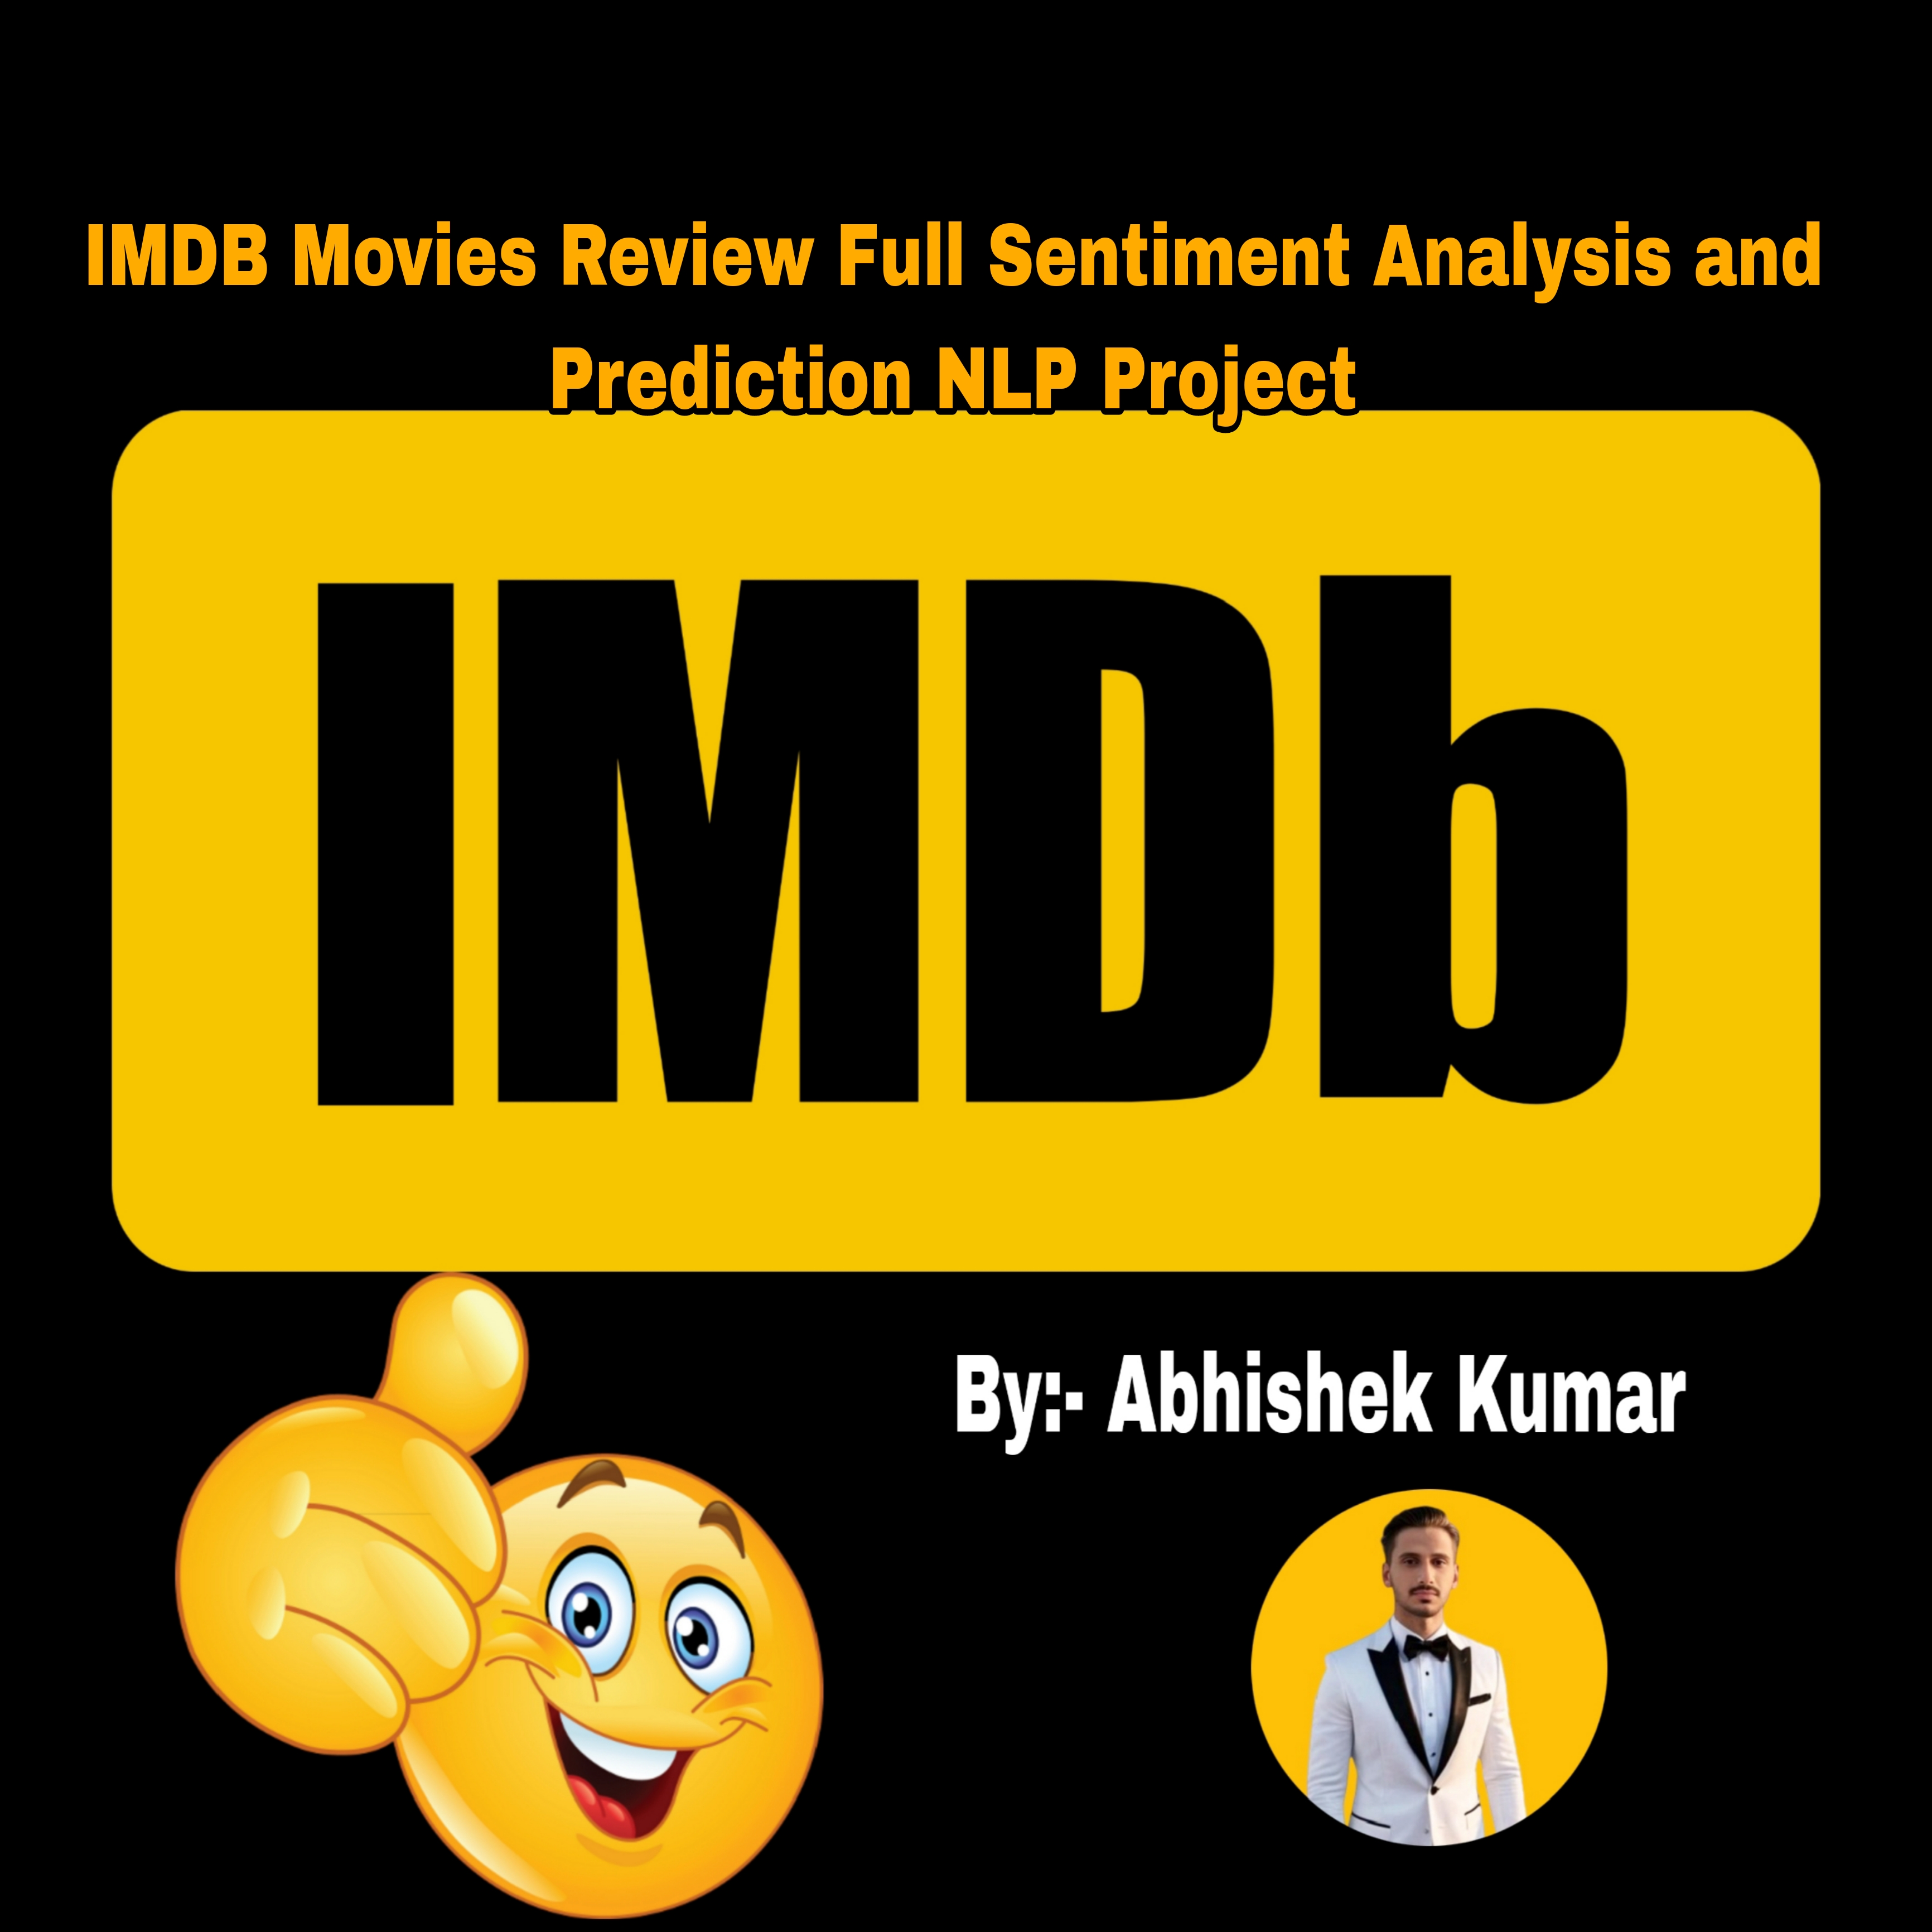

### Step1:----> Import ALL The Important Library

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
warnings.filterwarnings("ignore")

### Step2:---> Load the CSV File from the IMDB Dataset

In [2]:
data = pd.read_csv("/content/IMDB_Dataset.csv")

### Step3:---> Check the Top 5 Row of dataset

In [3]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Step4:----> Check the total shape of the dataset

In [4]:
data.shape

(50000, 2)

In [5]:
type(data)

pandas.core.frame.DataFrame

### Step3:---> Check the last 5 Row of dataset

In [6]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [7]:
data["sentiment"].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [8]:
# one hot encoding
# label encoder

In [9]:
# positive -> 1
# negative -> 0
data.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)

In [10]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [11]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0
49999,No one expects the Star Trek movies to be high...,0


In [12]:
data["sentiment"].value_counts()

sentiment
1    25000
0    25000
Name: count, dtype: int64

In [13]:
# LSTM -> LONG SHORT TERM MEMORY
# RNN -> TEXTUAL DATA

In [14]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [15]:
train_data, test_data = train_test_split(data, test_size = 0.2, random_state=42)

In [16]:
train_data.shape

(40000, 2)

In [17]:
test_data.shape

(10000, 2)

In [18]:
tokenizer = Tokenizer(num_words = 5000)
tokenizer.fit_on_texts(train_data["review"])

In [19]:
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data["review"]), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data["review"]), maxlen=200)

In [20]:
X_train

array([[1935,    1, 1200, ...,  205,  351, 3856],
       [   3, 1651,  595, ...,   89,  103,    9],
       [   0,    0,    0, ...,    2,  710,   62],
       ...,
       [   0,    0,    0, ..., 1641,    2,  603],
       [   0,    0,    0, ...,  245,  103,  125],
       [   0,    0,    0, ...,   70,   73, 2062]], dtype=int32)

In [21]:
X_test

array([[   0,    0,    0, ...,  995,  719,  155],
       [  12,  162,   59, ...,  380,    7,    7],
       [   0,    0,    0, ...,   50, 1088,   96],
       ...,
       [   0,    0,    0, ...,  125,  200, 3241],
       [   0,    0,    0, ..., 1066,    1, 2305],
       [   0,    0,    0, ...,    1,  332,   27]], dtype=int32)

In [22]:
Y_train = train_data["sentiment"]
Y_test = test_data["sentiment"]

In [23]:
Y_train

39087    0
30893    0
45278    1
16398    0
13653    0
        ..
11284    1
44732    1
38158    0
860      1
15795    1
Name: sentiment, Length: 40000, dtype: int64

In [24]:
# LSTM MODEL BUILDING

In [25]:
model = Sequential()
model.add(Embedding(input_dim =5000, output_dim = 128, input_length = 200))
model.add(LSTM(128, dropout=0.2, recurrent_dropout = 0.2))
model.add(Dense(1, activation = "sigmoid"))

model.summary()

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          640000    
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 771713 (2.94 MB)
Trainable params: 771713 (2.94 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model.compile(optimizer = "adam", loss="binary_crossentropy", metrics=["accuracy"])

In [28]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64, validation_split = 0.2)

Epoch 1/5
500/500 [==============================] - 230s 450ms/step - loss: 0.4180 - accuracy: 0.8075 - val_loss: 0.3278 - val_accuracy: 0.8646
Epoch 2/5
500/500 [==============================] - 202s 405ms/step - loss: 0.2812 - accuracy: 0.8871 - val_loss: 0.3277 - val_accuracy: 0.8654
Epoch 3/5
500/500 [==============================] - 209s 417ms/step - loss: 0.2405 - accuracy: 0.9054 - val_loss: 0.3016 - val_accuracy: 0.8788
Epoch 4/5
500/500 [==============================] - 197s 395ms/step - loss: 0.2026 - accuracy: 0.9233 - val_loss: 0.3181 - val_accuracy: 0.8765
Epoch 5/5
500/500 [==============================] - 200s 399ms/step - loss: 0.1768 - accuracy: 0.9318 - val_loss: 0.3518 - val_accuracy: 0.8727


In [29]:
model.save("model.h5")

In [34]:
import joblib
joblib.dump(tokenizer, "tokenizer.pkl")

['tokenizer.pkl']

In [30]:
loss, accuracy = model.evaluate(X_test, Y_test)

313/313 [==============================] - 20s 63ms/step - loss: 0.3350 - accuracy: 0.8759


In [31]:
print(loss)

0.3349868953227997


In [32]:
print(accuracy)

0.8758999705314636


In [33]:
# Building Predictive System

In [47]:
def predictive_system(review):
  sequences = tokenizer.texts_to_sequences([review])
  padded_sequence = pad_sequences(sequences, maxlen=200)
  prediction = model.predict(padded_sequence)
  sentiment = "positive" if prediction[0][0] > 0.5 else "negative"
  return sentiment

In [49]:
predictive_system("This movie was fantastic and amazing")

1/1 [==============================] - 0s 66ms/step


'positive'

In [50]:
predictive_system("A trilling adventure with stunning visual")

1/1 [==============================] - 0s 142ms/step


'positive'

In [51]:
predictive_system("A visual masterpiece")

1/1 [==============================] - 0s 96ms/step


'positive'

In [52]:
predictive_system("Overall long and slow")

1/1 [==============================] - 0s 63ms/step


'negative'